In [60]:
# Task 1: Computing the means and standard deviations from the given dataset

import scipy.io
from scipy.stats import multivariate_normal
from numpy.random import multivariate_normal
import numpy as np
test_data = scipy.io.loadmat('/content/drive/MyDrive/CSE 569/test_data.mat')
train_data = scipy.io.loadmat('/content/drive/MyDrive/CSE 569/train_data.mat')

In [ ]:
train_data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Mon Sep 13 17:22:22 2021',
 '__version__': '1.0',
 'data': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0

In [ ]:
train_data['label'][0][2]

3

In [ ]:
train_data['data'][1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 254, 254,
        255, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

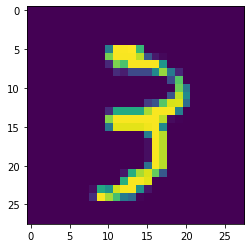

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(r)


In [ ]:
def calculate_mean_and_sd(imgArr):
  image_space = []
  for image in imgArr['data']:
    mean = np.mean(image)
    stdDev = np.std(image)
    image_space.append([mean, stdDev])
  
  return image_space

train_vectors = calculate_mean_and_sd(train_data)
test_vectors = calculate_mean_and_sd(test_data)

# samples
train_vectors[0]


[33.91326530612245, 77.80627517549414]

In [ ]:
# M1: Mean of means, M2: Mean of SD's
# S1: SD of means, S2: SD of SD's

# for training data:
means_training = [m[0] for m in train_vectors]
sds_training = [s[1] for s in train_vectors]

M1_train = np.mean(means_training)
M2_train = np.mean(sds_training)
S1_train = np.std(means_training)
S2_train = np.std(sds_training)

[M1_train, M2_train, S1_train, S2_train]

[32.50435107148159, 76.44042397326842, 9.349449452973936, 10.509725393032214]

In [ ]:
# for test data:
means_test = [m[0] for m in test_vectors]
sds_test = [s[1] for s in test_vectors]

M1_test = np.mean(means_test)
M2_test = np.mean(sds_test)
S1_test = np.std(means_test)
S2_test = np.std(sds_test)

[M1_test, M2_test, S1_test, S2_test]

[33.23068083782369, 77.1949417103036, 9.807076720815555, 10.874661388710518]

In [55]:
# Normalization:

def normalizer(images, M1, M2, S1, S2):
  normalized_vectors = []
  for image in images:
    y1 = (image[0] - M1)/S1
    y2 = (image[1] - M2)/S2
    y = [y1, y2]
    normalized_vectors.append(y)
  
  return normalized_vectors

# training data
train_normalized = normalizer(train_vectors, M1_train, M2_train, S1_train, S2_train)

train_normalized

[[0.1506948876217202, 0.12996069365725302],
 [-0.973866581492434, -0.9347317077570471],
 [-0.6034693488532338, -0.6292426044376932],
 [-0.45544688203425293, -0.344728541239518],
 [-1.477825099860466, -1.6020043133715554],
 [-0.9386686124239575, -1.1664688811145016],
 [0.7740263631018337, 0.6887366237957226],
 [0.37675316183282737, 0.5273018967805366],
 [-0.05258020506056676, -0.16528665416882093],
 [2.338426019335245, 1.9617653813374598],
 [1.0981751014998964, 1.028249186302781],
 [0.5738890738636357, 0.5814161904019362],
 [0.5968086816291555, 0.5602772211358952],
 [-0.1753638180901358, -0.12358484095396216],
 [-1.6569527486469375, -2.067469904511112],
 [0.09162232713082798, 0.0537344766935688],
 [0.9779835869676181, 0.9222526237946689],
 [1.4041791504169225, 1.5206454452945126],
 [0.18848495518748815, 0.1707542706507739],
 [0.5688413031057531, 0.5561396063338897],
 [-0.20715113124112428, -0.2929220976981944],
 [-0.5913274137869765, -0.6867369909781947],
 [0.308812895956466, 0.30022289

In [56]:
# testing data
test_normalized = normalizer(test_vectors, M1_test, M2_test, S1_test, S2_test)

test_normalized

[[1.276429664856464, 1.1790402224769463],
 [0.3245191772124827, 0.4997357138930378],
 [1.2626432853387346, 1.1031891181437805],
 [2.60889625126343, 2.1296933873695805],
 [-0.07164414364604506, -0.10773717345142761],
 [-1.1521841533941246, -1.3172873416111137],
 [0.8986048299601984, 0.8713499257894904],
 [-0.9496804467044568, -1.0715246949235393],
 [0.012244675117497225, 0.14448575466491032],
 [-0.5489650194013957, -0.5212291981477531],
 [-0.5907143385069726, -0.5291335946358923],
 [0.676982276203491, 0.6640391392219821],
 [2.573910061732588, 2.0085861626714445],
 [-0.44725795541210844, -0.36729281441221534],
 [0.9299493343354136, 0.8623805790176466],
 [-0.7675961889231243, -0.7346696158025],
 [1.1730318184734931, 1.1006867937894544],
 [0.8092534834632159, 0.8248734988172818],
 [1.3358671690036563, 1.14944580529862],
 [1.1259500318186055, 1.042569736381299],
 [0.30084822370090974, 0.3429287933890685],
 [0.8007995714947974, 0.6982191730027689],
 [0.3477999501716678, 0.3293325470611427],


In [57]:
# Segregating Class "3" and Class "7" images' values from the training data
x3 = []
x7 = []
for i in range(0, len(train_data['label'][0])):
  if train_data['label'][0][i] == 3:
    x3.append(train_normalized[i])
  elif train_data['label'][0][i] == 7:
    x7.append(train_normalized[i])

x3

[[0.1506948876217202, 0.12996069365725302],
 [-0.973866581492434, -0.9347317077570471],
 [-0.6034693488532338, -0.6292426044376932],
 [-0.45544688203425293, -0.344728541239518],
 [-1.477825099860466, -1.6020043133715554],
 [-0.9386686124239575, -1.1664688811145016],
 [0.7740263631018337, 0.6887366237957226],
 [0.37675316183282737, 0.5273018967805366],
 [-0.05258020506056676, -0.16528665416882093],
 [2.338426019335245, 1.9617653813374598],
 [1.0981751014998964, 1.028249186302781],
 [0.5738890738636357, 0.5814161904019362],
 [0.5968086816291555, 0.5602772211358952],
 [-0.1753638180901358, -0.12358484095396216],
 [-1.6569527486469375, -2.067469904511112],
 [0.09162232713082798, 0.0537344766935688],
 [0.9779835869676181, 0.9222526237946689],
 [1.4041791504169225, 1.5206454452945126],
 [0.18848495518748815, 0.1707542706507739],
 [0.5688413031057531, 0.5561396063338897],
 [-0.20715113124112428, -0.2929220976981944],
 [-0.5913274137869765, -0.6867369909781947],
 [0.308812895956466, 0.30022289

In [72]:
# Task 2: Calculating MLE Parameters mu and sigma for each class 3 and 7
def get_mle_params(data):
  mu = np.mean(data, axis=0)
  sigma = np.matmul((data - mu).T, (data - mu)) / len(data)

  return mu, sigma

mean3 = np.mean(x3, axis=0)
mean7 = np.mean(x7, axis=0)

cov3 = np.matmul((x3 - mean3).T, (x3 - mean3)) / len(x3)
cov7 = np.matmul((x7 - mean7).T, (x7 - mean7)) / len(x7)

mle3 = np.random.multivariate_normal(mean3, cov3, 10000)
mle7 = np.random.multivariate_normal(mean7, cov7, 10000)

mu3, sigma3 = get_mle_params(mle3)
mu7, sigma7 = get_mle_params(mle7)

[mu3, sigma3, mu7, sigma7]

[array([0.37152973, 0.31193664]), array([[1.05133432, 0.98695699],
        [0.98695699, 0.95733673]]), array([-0.36925479, -0.31269275]), array([[0.66713948, 0.73363032],
        [0.73363032, 0.83049492]])]

In [73]:
# Task 3:
likelihood_3 = scipy.stats.multivariate_normal.pdf(x=x3, mean=mu3, cov=sigma3)
likelihood_7 = scipy.stats.multivariate_normal.pdf(x=x7, mean=mu7, cov=sigma7)

[likelihood_3, likelihood_7]

[array([0.8550125 , 0.37223921, 0.55654709, ..., 0.52609566, 0.48740797,
        0.33520448]),
 array([1.12956675, 0.61068034, 0.89789721, ..., 1.06484131, 1.19110887,
        0.58749459])]

In [78]:
def error_calc(post3, post7):
  err3 = []
  err7 = []
  # error in class3:
  for i in range(0, min(len(post3), len(post7))):
    if post7[i] > post3[i]:
      err3.append(post7[i])
  
  # error in class7:
  for i in range(0, min(len(post3), len(post7))):
    if post3[i] > post7[i]:
      err7.append(post3[i])
  
  return err3, err7, np.mean(err3), np.mean(err7)

# Multiply with priors as in given cases to get posteriors
# Case 1: P(3) = P(7) = 0.5
case1_p3 = 0.5 * likelihood_3
case1_p7 = 0.5 * likelihood_7

case1_err3, case1_err7, p_case1_err3, p_case1_err7 = error_calc(case1_p3, case1_p7)

# Case 2: P(3) = 0.3, P(7) = 0.7
case2_p3 = 0.3 * likelihood_3
case2_p7 = 0.7 * likelihood_7

case2_err3, case2_err7, p_case2_err3, p_case2_err7 = error_calc(case2_p3, case2_p7)


[case1_p3, case1_p7, case2_p3, case2_p7, len(case1_p3), len(case1_p7), len(case2_p3), len(case2_p7)]

[array([0.42750625, 0.1861196 , 0.27827355, ..., 0.26304783, 0.24370399,
        0.16760224]),
 array([0.56478337, 0.30534017, 0.44894861, ..., 0.53242066, 0.59555443,
        0.29374729]),
 array([0.25650375, 0.11167176, 0.16696413, ..., 0.1578287 , 0.14622239,
        0.10056134]),
 array([0.79069672, 0.42747624, 0.62852805, ..., 0.74538892, 0.83377621,
        0.41124621]),
 5713,
 5835,
 5713,
 5835]

In [79]:
# Case 1 errors: err(3), err(7), P(err_3), P(err_7)
[case1_err3, case1_err7, p_case1_err3, p_case1_err7]

[[0.5647833744703453,
  0.30534017207884107,
  0.4489486063206612,
  0.3000024329490683,
  0.534390802013771,
  0.19114727253595665,
  0.48093294334935927,
  0.4699289356852177,
  0.5058863790272287,
  0.4909650348028501,
  0.5792933163736814,
  0.4899579441388583,
  0.41605765710621134,
  0.36475703053643527,
  0.5428458393582749,
  0.6175762280908598,
  0.19668166882130075,
  0.14143852326589365,
  0.19785104719252786,
  0.2309711959059578,
  0.4912334581280325,
  0.3415665228250072,
  0.42455289770167326,
  0.5999838808701708,
  0.23904752361628012,
  0.20596852494823897,
  0.15743100284208222,
  0.11001632616686109,
  0.39566193540399835,
  0.3146343652375421,
  0.35135390310972425,
  0.41060474256525537,
  0.5111187356311148,
  0.33207142265951634,
  0.29162648994511603,
  0.4832073754869983,
  0.5680799187931033,
  0.48967939648778946,
  0.4469676596473158,
  0.40357052728577236,
  0.5119017432733308,
  0.3604654085503116,
  0.5056616556361946,
  0.30663628782097324,
  0.50639709

In [80]:
# Case 2 errors: err(3), err(7), P(err_3), P(err_7)
[case2_err3, case2_err7, p_case2_err3, p_case2_err7]

[[0.7906967242584834,
  0.42747624091037745,
  0.6285280488489257,
  0.42000340612869563,
  0.06834066078882743,
  0.7481471228192793,
  0.5272752670039987,
  0.38937037710052713,
  0.2676061815503393,
  0.6733061206891029,
  0.6579005099593047,
  0.7082409306381201,
  0.6873510487239901,
  0.811010642923154,
  0.6859411217944016,
  0.4674455713514519,
  0.5824807199486959,
  0.5106598427510094,
  0.58520061559575,
  0.7599841751015848,
  0.1510416354249079,
  0.8646067193272037,
  0.27535433634982104,
  0.2969146973928984,
  0.1980139325722511,
  0.276991466069539,
  0.3233596742683409,
  0.6877268413792454,
  0.47819313195501006,
  0.5943740567823426,
  0.2648321566477473,
  0.2595782556910021,
  0.8399774332182391,
  0.33466653306279215,
  0.28835593492753453,
  0.3999104914702359,
  0.22040340397891509,
  0.15402285663360551,
  0.5539267095655976,
  0.44048811133255894,
  0.4918954643536139,
  0.14974264022548334,
  0.5748466395913575,
  0.7155662298835607,
  0.24293081753401535,
 

In [81]:
# Final results
# Case 1
[p_case1_err3, p_case1_err7]


[0.433263557693754, 0.3104186655504885]

In [82]:
# Case 2
[p_case2_err3, p_case2_err7]

[0.5541544777549643, 0.17456573694706903]